In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Importing data
path = r'C:\Users\dylan\Documents\Instacart Basket Analysis'

customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))
customers.head()

,order_id,user_id,eval_set,order_number,order_dow,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,exist
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


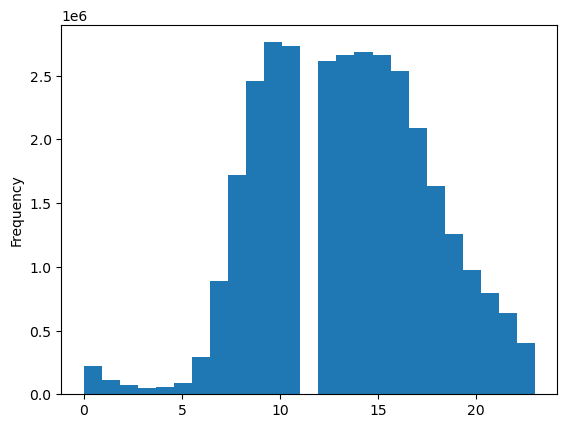

In [13]:
#Histogram for hour of order
hist = customers['hour_of_order'].plot.hist(bins=25)

In [14]:
#Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_order.png'))

## The histogram shows that the busiest hours are around the middle of the day, with no data for hour 12 most likely due to lunch.

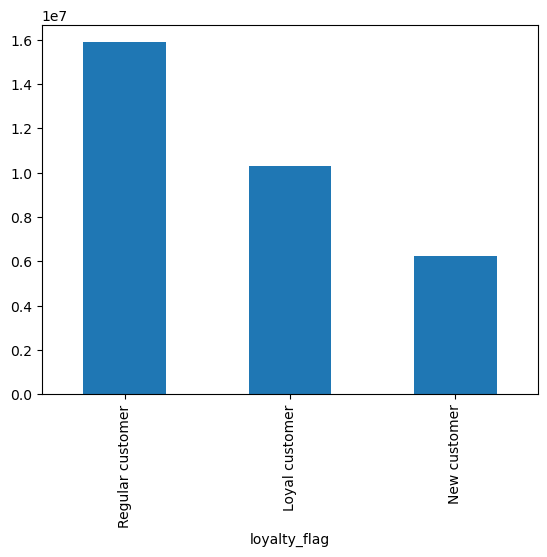

In [8]:
#Bar chart for loyalty flag
bar = customers['loyalty_flag'].value_counts().plot.bar()


In [15]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'))

In [7]:
#Creating sample
np.random.seed(4)
dev = np.random.rand(len(customers)) <= 0.7
big = customers[dev]
small = customers[~dev]

df = small[['prices', 'hour_of_order']]
df.head()

,prices,hour_of_order
0,9.0,8
2,9.0,12
3,9.0,7
6,9.0,9
10,12.5,8


C:\Users\dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


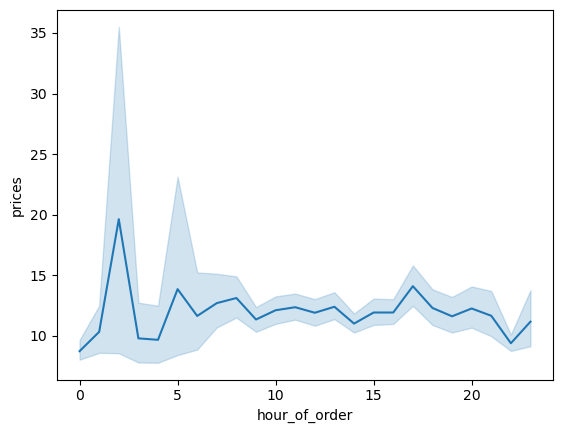

In [16]:
#Line chart for prices and hour of day
df.replace(np.inf, np.nan)
line = sns.lineplot(data = df, x = 'hour_of_order', y = 'prices')

In [ ]:
#Exporting line 1
line.figure.savefig(os.path.join('04 Analysis', 'Visualizations', 'line_prices_hour.png'))

C:\Users\dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


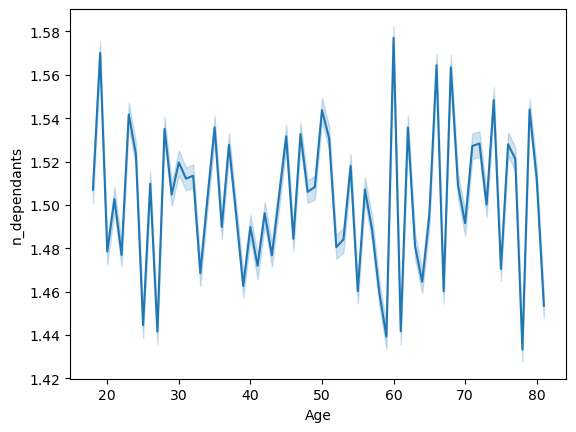

In [11]:
#Line chart for customer demographics
df2 = small[['Age', 'n_dependants']]

line2 = sns.lineplot(data = df2, x = 'Age', y = 'n_dependants')

In [17]:
#Exporting line 2
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

## The line chart shows that there isn't too much of a correlation between age and number of dependants.

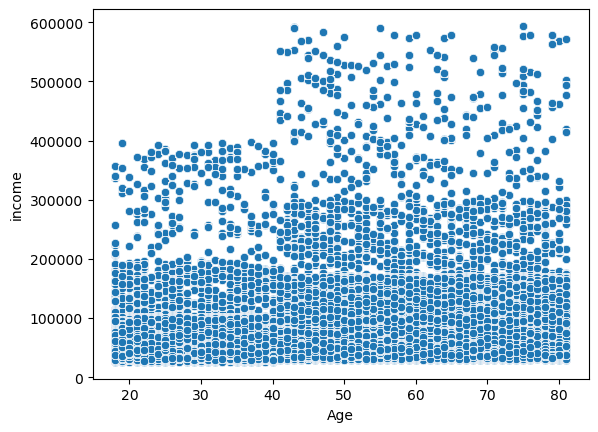

In [12]:
#Scatterplot for spending power
scatter = sns.scatterplot(x = 'Age', y = 'income', data = customers)

## The scatterplot shows that in general, as age goes up so does income. There are a large concentration of entries in the lower income brackets for all ages, which checks out with economic demographics.

In [ ]:
#Exporting scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))